# Measurements in stabilography

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

Posturography is a general term for all techniques concerned with quantifying postural sway of a standing person.  

Typically in posturography, instead of measuring the actual sway of each segment, measurements of the whole body sway have been used. The displacements of center of pressure (COP) and of the vertical projection (on the horizontal plane) of the center of gravity (COGv) are the most common measures of body sway (however, keep in mind that the COP displacement is not an actual measurement of postural sway of the body or of any of its segments). While the COP displacement can be easily measured with a force plate, the direct measurement of the COGv is more complicated and typically subject to a larger error. The measurement of the COGv is computed by measuring the position of each body segment combined with the mass of each segment. More commonly, the COGv displacement is determined indirectly from the COP displacement and different methods are available for such, which produce similar results (Lafond et al. 2004).  See the notebook [The inverted pendulum model of the human standing posture](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/IP_Model.ipynb) for a description and code of one of these methods.

It is possible to quantify a certain property of a phenomenon, like the postural control during upright standing, without any underlying scientific theory on what generated that property and what the implication of that measurement for the understanding of the phenomenon is. Sometimes, this is the only approach to start with. However, as our knowledge on the phenomenon advances, the need for a scientific theory or a hypothesis to interpret the results in a more meaningful way becomes evident. It is relatively easy to perform many measurements of the body sway during upright standing; far more difficult is to interpret those measurements to understand what they mean.   

The most widespread empirical interpretation of typical measurements of posture sway is that more sway means more instability which is seen as an indication of a deteriorated postural control system. This rationale is based on many experiments on aging and pathological conditions that, indeed, have observed increased sway in those conditions. However, bear in mind that it might not always be the case.  

Selecting which measurement will be used to quantify a certain characteristic of the postural control depends on which experiment we design and which task the individual under evaluation is performing. In this sense, posturography has been divided into two experimental paradigms: dynamic and static posturography. In static posturography, the individual is typically trying to stay as quiet as possible while his or her sway is measured, and no perturbation is applied during the task. In dynamic posturography, a momentary perturbation is applied and how the subject responded to that perturbation is measured.   

Let's show some of the most common measures of postural sway, more typically employed in static posturography.   

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd  # use Pandas to read data from a website
fileUrl = 'http://www.udel.edu/biology/rosewc/kaap686/reserve/cop/copdata.txt'
COP = pd.read_table(fileUrl, skipinitialspace=True, sep=None, engine='python')  # Pandas dataframe
COP = COP.values / 10  # mm to cm
freq = 100
print('COP shape: ', COP.shape)

COP shape:  (4095, 2)


In [3]:
def cop_plot(freq, COP, units='cm'):
    '''
    Plot COP data from postural sway measurement.
    '''
    import matplotlib.gridspec as gridspec
    t = np.linspace(0, COP.shape[0]/freq, COP.shape[0])
    plt.rc('axes', labelsize=16,  titlesize=16)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.figure(figsize=(10, 4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
    ax1 = plt.subplot(gs[0])
    ax1.plot(t, COP[:,0], lw=2, color=[0, 0, 1, 1], label='ap')
    ax1.plot(t, COP[:,1], lw=2, color=[1, 0, 0, 1], label='ml')
    ax1.set_xlim([t[0], t[-1]])
    ax1.grid()
    ax1.locator_params(axis='both', nbins=5)
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('COP [%s]' %units)
    ax1.set_title('Stabilogram')
    ax1.legend(fontsize=12, loc='best', framealpha=.5)
    ax2 = plt.subplot(gs[1])
    ax2.plot(COP[:,1], COP[:,0], lw=2, color='g')
    ax2.set_xlabel('COP ml [%s]' %units)
    ax2.set_ylabel('COP ap [%s]' %units)
    ax2.set_title('Statokinesigram')
    if 0:  # plot the axes with the same colors of the COP data
        ax2.xaxis.label.set_color('red')
        ax2.spines['bottom'].set_color('red')
        ax2.tick_params(axis='x', colors='red')
        ax2.yaxis.label.set_color('blue')
        ax2.spines['left'].set_color('blue')
        ax2.tick_params(axis='y', colors='blue')
    ax2.grid()
    ax2.locator_params(axis='both', nbins=5)
    plt.tight_layout()
    plt.show()

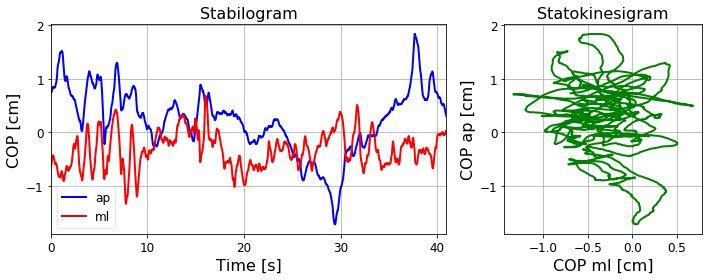

In [4]:
# plot data
cop_plot(freq, COP)

## Data detrend

The mean value of the COP (or COGv) displacement is dependent where the individual stood on the force plate or in the space and usually has no particular interest to the understanding of postural sway. So, a typical procedure in the analysis of postural sway is to remove the mean value of the data. Related to that, the presence of a trend (a slow fluctuation) in the signal might also affect some of the measurements. Someone might argue that the trend itself could give valuable information about the signal (see Duarte and Zatsiorsky, 2000), but the problem is that most of the measurements one uses to describe a signal assumes that the signal is stationary. A signal is stationary if its statistical properties (such as mean and variance) do not change across time. So, to detrend the data might be necessary in certain cases. Another way to remove a trend in the data is to apply a high pass filter to the data with a cut-off frequency related to the period of data acquisition (Witt et al., 1998).   

Let's see a simple function for data detrend in Python and use it to remove the mean of the data.

In [5]:
from scipy.signal import detrend
COP = detrend(COP, axis=0, type='constant')  # use 'linear' to remove a linear trend

## Measurements of spatial variability 

Standard deviation, RMS, range (or amplitude), and total path (or total displacement) are commonly employed to describe the spatial variability of some measurement of postural sway. For the data represented by $x$, these variables are defined as:

$$ \bar{x} \; (mean) = \frac{1}{N}\sum_{i=1}^{N} x_i $$

$$ SD = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N} (x_i - \bar{x})^2} $$

$$ RMS = \sqrt{\frac{1}{N}\sum_{i=1}^{N} x_i^2} $$

$$ Range = max[x] - min[x] $$

$$ Total \: path = \sum_{i=1}^{N-1} | x_{i+i}-x_i | $$

In [6]:
m = np.mean(COP, axis=0)  # mean
sd = np.std(COP, axis=0)  # standard deviation
rms = np.sqrt(np.mean(COP ** 2, axis=0))  # root-mean square
rang = np.max(COP, axis=0) - np.min(COP, axis=0)  # range (maximum - minimum)
tpath = np.sum(np.abs(np.diff(COP, axis=0)), axis=0) # total path (length of the COP displacement)

unit = 'cm'
print('Measurements of spatial variability')
print('{0:12} {1:^16}'.format('Variable', 'Direction'))
print('{0:12} {1:^8} {2:^5}'.format('', 'ap', 'ml'))
print('{0:12} {1:>6.2f} {2:>6.2f} {3:>3}'.format('Mean:', m[0], m[1], unit))
print('{0:12} {1:>6.2f} {2:>6.2f} {3:>3}'.format('SD:', sd[0], sd[1], unit))
print('{0:12} {1:>6.2f} {2:>6.2f} {3:>3}'.format('RMS:', rms[0], rms[1], unit))
print('{0:12} {1:>6.2f} {2:>6.2f} {3:>3}'.format('Range:', rang[0], rang[1], unit))
print('{0:12} {1:>6.2f} {2:>6.2f} {3:>3}'.format('Total path:', tpath[0], tpath[1], unit))

Measurements of spatial variability
Variable        Direction    
                ap     ml  
Mean:         -0.00  -0.00  cm
SD:            0.61   0.33  cm
RMS:           0.61   0.33  cm
Range:         3.56   2.02  cm
Total path:   28.61  44.32  cm


## Mean velocity (or mean speed)

The mean speed variable expresses the the average velocity of the COP displacement computed simply as the total path variable (the total displacement) divided by the total period. This variable is usually referred as velocity but as it a scalar, it should in fact be named speed.   
The mean resultant speed is the speed calculated in the vectorial form considering each direction (the square root of the sum of the squared speed in each direction). For the data represented by *x* and *y*, these variables are defined as:
$$ Mean \: speed = \frac{1}{T}\sum_{i=1}^{N-1} | x_{i+i}-x_i | $$

$$ Mean \: resultant \: speed = \frac{1}{T}\sum_{i=1}^{N-1} \sqrt{( x_{i+i}-x_i )^2 + ( y_{i+i}-y_i )^2} $$

In [7]:
mvel = np.sum(np.abs(np.diff(COP, axis=0)), axis=0) / 30
mvelr = np.sum(np.abs(np.sqrt(np.sum(np.diff(COP, axis=0) ** 2, axis=1))), axis=0) / 30
print('{0:15} {1:^16}'.format('Variable', 'Direction'))
print('{0:15} {1:^8} {2:^5}'.format('', 'ap', 'ml'))
print('{0:15} {1:>6.2f} {2:>6.2f} {3:>5}'.format('Mean velocity:', mvel[0], mvel[1], unit+'/s'))
print('')
print('{0:22} {1:>6.2f} {2:>5}'.format('Mean resultant velocity:', mvelr, unit+'/s'))

Variable           Direction    
                   ap     ml  
Mean velocity:    0.95   1.48  cm/s

Mean resultant velocity:   1.93  cm/s


In [8]:
print('Squared sum of the mean speeds:')
print('{0:>6.2f} {1:>5}'.format(np.sqrt(np.sum(mvel ** 2)), unit+'/s'))

Squared sum of the mean speeds:
  1.76  cm/s


## Area

Another measurement of postural sway is to compute the area that encompasses the COPap versus COPml data using a curve in a plane (e.g., a circle or ellipse) or a polygon (e.g., a rectangle). A common method for such is to compute a prediction ellipse, which is found by fitting an ellipse to the data using concepts from the statistical procedure known as principal component analysis. A 95% prediction ellipse is a prediction interval for the COP data (considered to be a bivariate random variable) such that there is 95% of probability that a new observation will lie inside the ellipse. For more details, see [Prediction ellipse and ellipsoid](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/PredictionEllipseEllipsoid.ipynb).

The function `ellipseoid.py` (see [Prediction ellipse and ellipsoid](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/PredictionEllipseEllipsoid.ipynb)) calculates the ellipse area, some related parameters, and plots the results for a given multivariate random variable.

In [9]:
import sys
sys.path.insert(1, r'./../functions')
from hyperellipsoid import hyperellipsoid

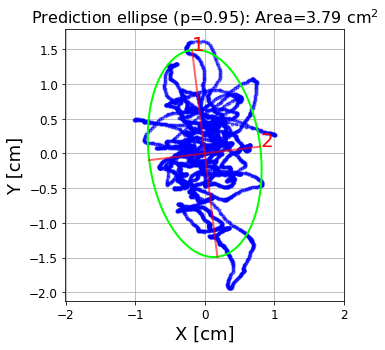

In [10]:
area, axes, angles, center, R = hyperellipsoid(COP[:, 1], COP[:, 0], units='cm')

## Frequency analysis

Frequency analysis refers to estimate the frequency content of a signal. Let's use standard Fourier analysis and the related power spectral analysis to estimate some frequency characteristics of the COP displacement. The function `psd.py` (see its code in the notebook [Fast Fourier Transform and Power Spectral Density](https://nbviewer.jupyter.org/github/BMClab/BMC/blob/master/notebooks/FourierTransform.ipynb)) estimates power spectral density characteristics using Welch's method using the `scipy.signal.welch` function, estimates some frequency characteristics, and a plots the results. 

Let's use `psd.py` to estimate the frequency characteristics of the COP data.

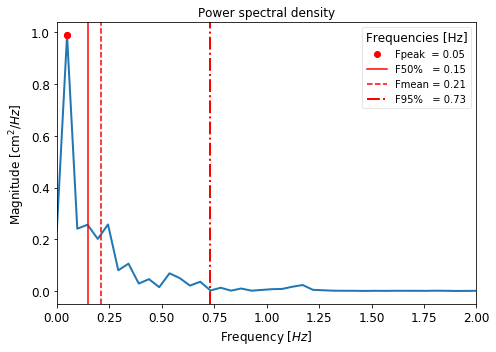

In [11]:
from psd import psd
fp_ap, mf_ap, fmax_ap, Ptot_ap, F, P_ap = psd(COP[:, 0], fs=freq, scales='linear', xlim=[0, 2], units='cm')

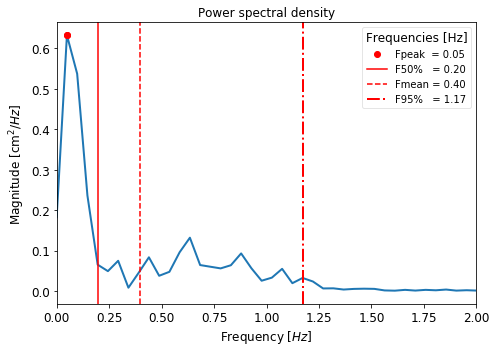

In [12]:
fp_ml, mf_ml, fmax_ml, Ptot_ml, F, P_ml = psd(COP[:, 1], fs=freq, xlim=[0, 2], units='cm')

## Other analyses



## References

- Duarte M, Zatsiorsky VM (2000) [On the fractal properties of natural human standing](http://www.ncbi.nlm.nih.gov/pubmed/10754215). Neuroscience Letters, 283, 173-176.  
- Lafond, D., M. Duarte, et al. (2004). [Comparison of three methods to estimate the center of mass during balance assessment](http://www.ncbi.nlm.nih.gov/pubmed/15275850). J. Biomech. 37(9): 1421-1426.   
- Witt A, Kurths J, Pikovsky A (1998) [Testing stationarity in time series](http://journals.aps.org/pre/abstract/10.1103/PhysRevE.58.1800). Physical Review E, 58, 1800-1810.